# IMD - UFRN

**Aluno: **Carlos Vinícius dos Santos

**Professor:** Ivanovitch

**Trabalho para nota extra da primeira unidade** 

**Código para fazer upload dos arquivos no Colab**

In [52]:
# Uploading files from your local file system

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ArquivoFINAL_PERFEITO_RN.csv to ArquivoFINAL_PERFEITO_RN.csv
User uploaded file "ArquivoFINAL_PERFEITO_RN.csv" with length 28180152 bytes


# Correção do arquivo CSV

**Comando usado para retirar os acentos:**

unaccent ISO-8859-1 < votacao_candidato_munzona_2018_RN.csv > ArquivoSemAcento.csv

**Comando usado para remover as virgulas que estavam no CSV, na frase do partido PSL:"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS", pois posteriormente elas iriam atrapalhar a leitura do CSV.**

sed 's/,//g' <Arquivo_VirgulaRN.csv> ArquivoFINAL_PERFEITO_RN.csv

**Comando usado para transformar ; em , :**

sed 'y/;/,/' <ArquivoSemAcento.csv> Arquivo_VirgulaRN.csv

**Comando usado para retirar as aspas ":**

sed 's/"//g' <Arquivo_VirgulaRN.csv> ArquivoFINAL_PERFEITO_RN.csv



# **Dados Eleições no RN: Deputado Estadual, Deputado Federal , Senador e Governador.**

# **Código para importar o pandas e Organizar o CSV para posteriormente utilizar da melhor maneira possível:**

In [0]:
import pandas as pd
#Ler o CSV
data = pd.read_csv("ArquivoFINAL_PERFEITO_RN.csv")
#Remover algumas colunas que serão inúteis
data.drop(columns=["DT_GERACAO","HH_GERACAO","ANO_ELEICAO","CD_TIPO_ELEICAO","NR_TURNO","CD_ELEICAO","DS_ELEICAO","DT_ELEICAO","TP_ABRANGENCIA","SG_UF","SG_UE","NM_UE","NM_SOCIAL_CANDIDATO","DS_SITUACAO_CANDIDATURA"],inplace=True)
#Analizando se o dataframe possui colunas com valores faltando
data.isnull().sum()
#Analizando informações do dataframe
data.info()

# Gráfico mostrando a distribuição da quantidade de votos dos candidatos do RN, por cidade:

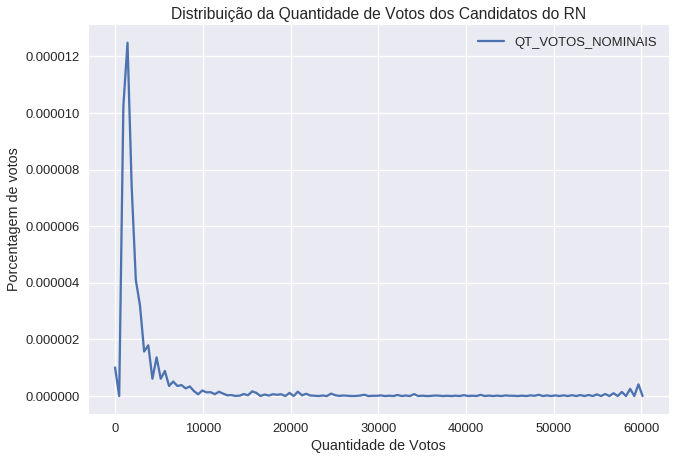

In [74]:
#Importando o matplotlib e o pandas
import matplotlib.pyplot as plt
import seaborn as sns

#utilizando o seaborn
sns.set()
#escolhendo o tamanho da fonte
sns.set_context("talk")

#Definindo os valores da coluna DS_CARGO como string para poder utilizá-los no Gráfico
data["DS_CARGO"] = data["DS_CARGO"].astype(str)
#escolhendo a coluna que será usada no seaborn
sns.kdeplot(data["QT_VOTOS_NOMINAIS"])
#definindo o título, xlabel e ylabel
plt.title('Distribuição da Quantidade de Votos dos Candidatos do RN')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Porcentagem de votos')
plt.show()

**Observações sobre os datos:**

Podemos observar nesse gráfico que a maioria dos candidatos recebeu entre 0 e 5 mil votos (aproximadamente), isso também se  deve ao fato de que a maioria das cidades do RN terem poucos habitantes.

# Gráfico mostrando a distribuição da quantidade de votos dos candidatos do RN, por cidade, e separados entre os candidatos a Deputado Estadual, Deputado Federal , Senador e Governador :

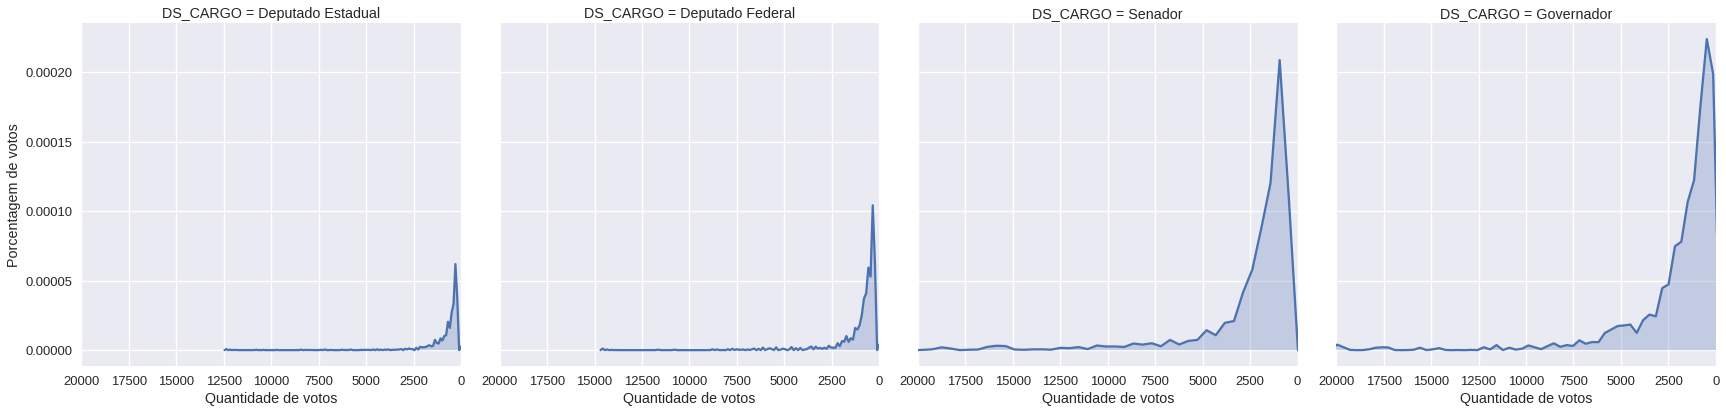

In [56]:
# Escolhendo a coluna que servirá para determinar quantos gráficos serão gerados e sobre o que será sua separação.O "col_order" serve para escolher a ordem de exibição
#OBS: por algum motivo quando eu definí o xlim o 0 foi para o lado direito dos gráficos e o 20000 veio para o lado esquerdo
g = sns.FacetGrid(data, col="DS_CARGO", size=6 ,col_order=["Deputado Estadual","Deputado Federal","Senador","Governador"],xlim =20000,)

# Escolhendo a coluna QT_VOTOS_NOMINAIS para que o gráfico mostre a quantidade de votos, e definindo os labels dos gráficos
g.map(sns.kdeplot, "QT_VOTOS_NOMINAIS", shade=True  ).set_xlabels("Quantidade de votos").set_ylabels("Porcentagem de votos")

# Mostrando o resultado
plt.show()

**Observações sobre os datos:**

Aparentemente ocorreram mais votos  para Governador e Senador.

# Gráfico mostrando a distribuição da quantidade de votos dos candidatos que tiveram como resultados: não eleito, suplente, eleito por QP, eleito por media e eleitos:

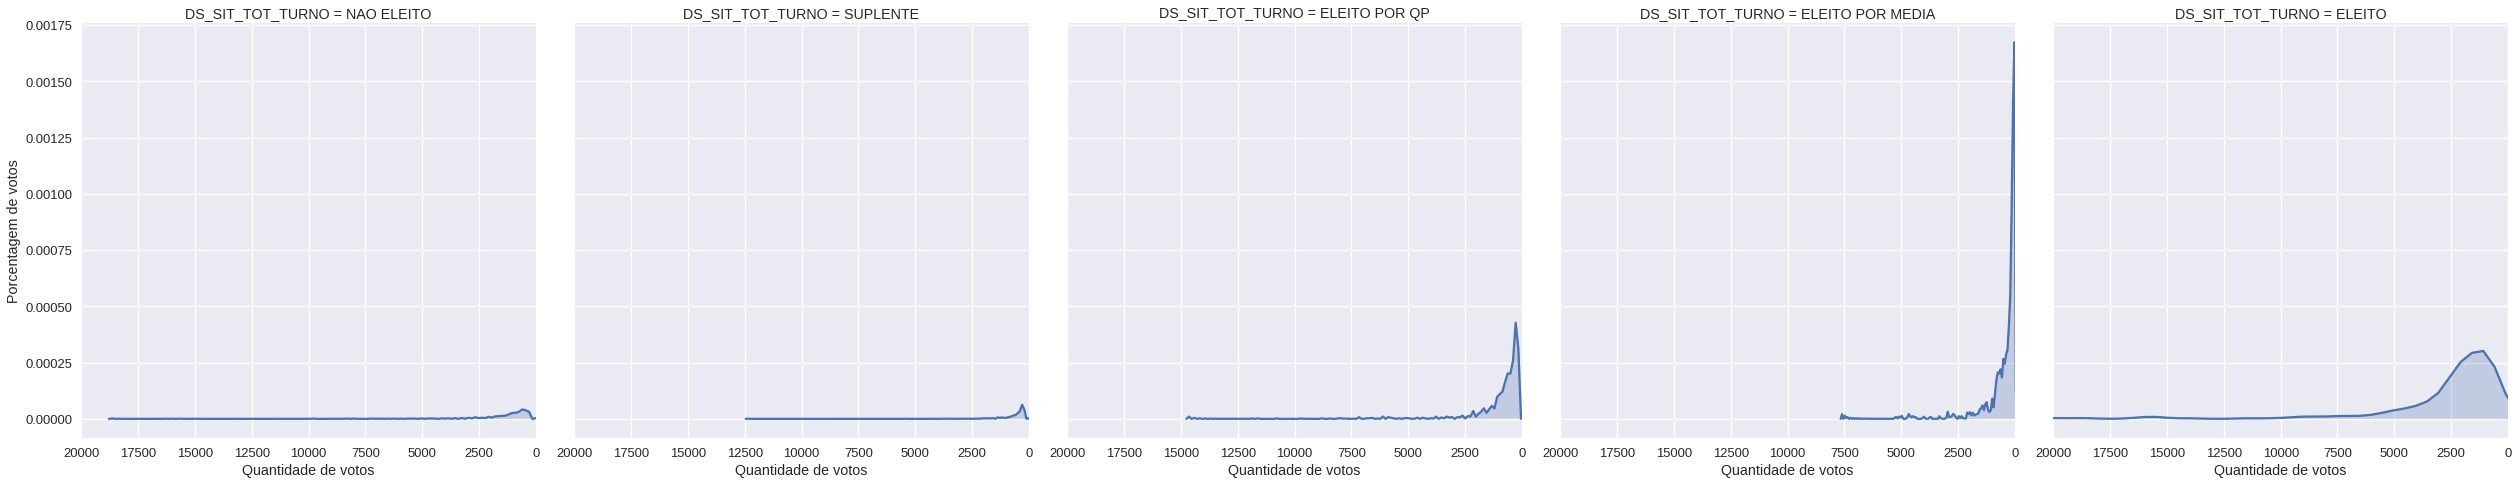

In [75]:
#Transformando as colunas que serão usadas, para string
data["DS_SIT_TOT_TURNO"] = data["DS_SIT_TOT_TURNO"].astype(str)
data["TP_AGREMIACAO"] = data["TP_AGREMIACAO"].astype(str)


g = sns.FacetGrid(data, col="DS_SIT_TOT_TURNO", size=7 ,col_order=["NAO ELEITO","SUPLENTE","ELEITO POR QP","ELEITO POR MEDIA","ELEITO"],xlim =20000)

g.map(sns.kdeplot, "QT_VOTOS_NOMINAIS", shade=True  ).set_xlabels("Quantidade de votos").set_ylabels("Porcentagem de votos")

plt.show()

**Observações sobre os datos:**

Podemos observar que no gráfico "eleitos por media" muitos candidatos que receberam poucos votos e mesmo assím foram eleitos

#-------------------------------------------------------------------------------------------
# **Dados da Eleição para Presidente:**

In [0]:
dataBR = pd.read_csv("ArquivoFINAL_PERFEITO_BR.csv")
dataBR.drop(columns=["DT_GERACAO","HH_GERACAO","ANO_ELEICAO","CD_TIPO_ELEICAO","NR_TURNO","CD_ELEICAO","DS_ELEICAO","DT_ELEICAO","TP_ABRANGENCIA","SG_UF","SG_UE","NM_UE","NM_SOCIAL_CANDIDATO","DS_SITUACAO_CANDIDATURA"],inplace=True)
dataBR.dropna(inplace=True)
dataBR.isnull().sum()
dataBR.info()

# Gráfico mostrando a distribuição da quantidade de votos dos candidatos a presidente:

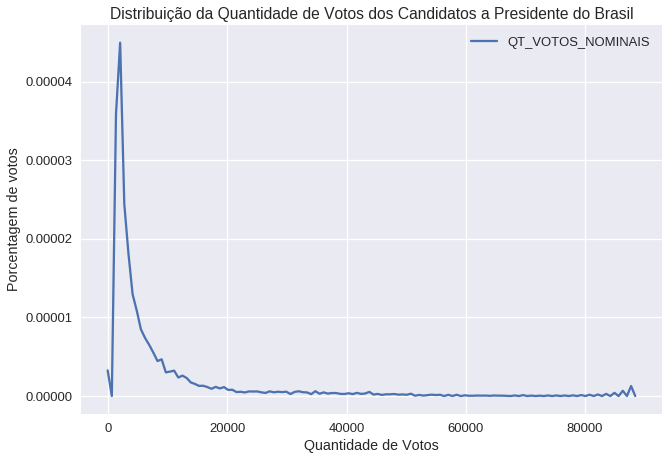

In [77]:
sns.set()
sns.set_context("talk")
sns.kdeplot(dataBR["QT_VOTOS_NOMINAIS"])
plt.title('Distribuição da Quantidade de Votos dos Candidatos a Presidente do Brasil')
plt.xlabel('Quantidade de Votos')
plt.ylabel('Porcentagem de votos')
plt.show()

**Observações sobre os datos:**

  Podemos observar que assim como nos gráficos dos candidatos do RN a maioria das quantidades de votos está entre 0 e 5 mil votos, isso mostra que a maiorias das cidades não tem muitos habitantes e que ouveram muitos candidatos com poucos votos e poucos com muitos votos. 

# Gráfico mostrando a distribuição da quantidade de votos separados em dois gráficos: o gráfico dos não eleitos e o dos que foram para o segundo turno.

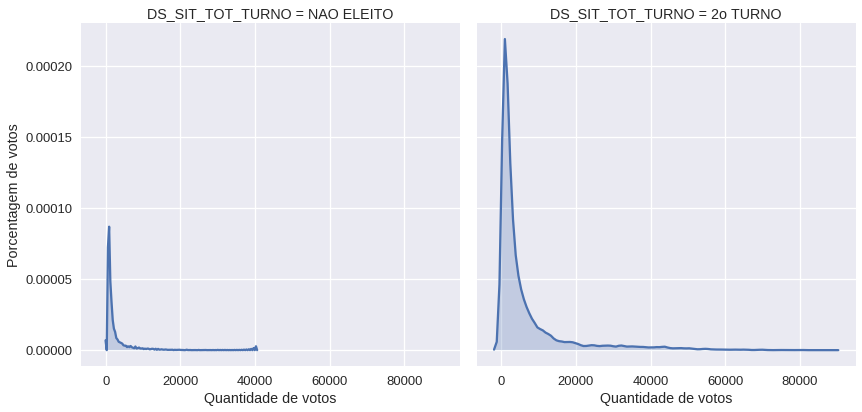

In [60]:
dataBR["DS_SIT_TOT_TURNO"] =dataBR["DS_SIT_TOT_TURNO"].astype(str)

# Dividindo em um gráfico para candidatos não eleitos e outro para os que foram para o segundo turno.
g = sns.FacetGrid(dataBR, col="DS_SIT_TOT_TURNO", size=6 )

# Escolhendo a coluna QT_VOTOS_NOMINAIS para que os gráficos mostrem a quantidade de votos dos candidatos.
g.map(sns.kdeplot, "QT_VOTOS_NOMINAIS", shade=True  ).set_xlabels("Quantidade de votos").set_ylabels("Porcentagem de votos")

# Plot the graph
plt.show()

**Observações sobre os datos:**

  Podemos observar que os candidatos que foram para o segundo turno receberam muitos votos a mais do que os que não foram.

# Gráfico mostrando a distribuição da quantidade de votos dos que receberam a maior quantidade de votos (Ciro Gomes, Fernando Haddad e Jair Bolsonaro):

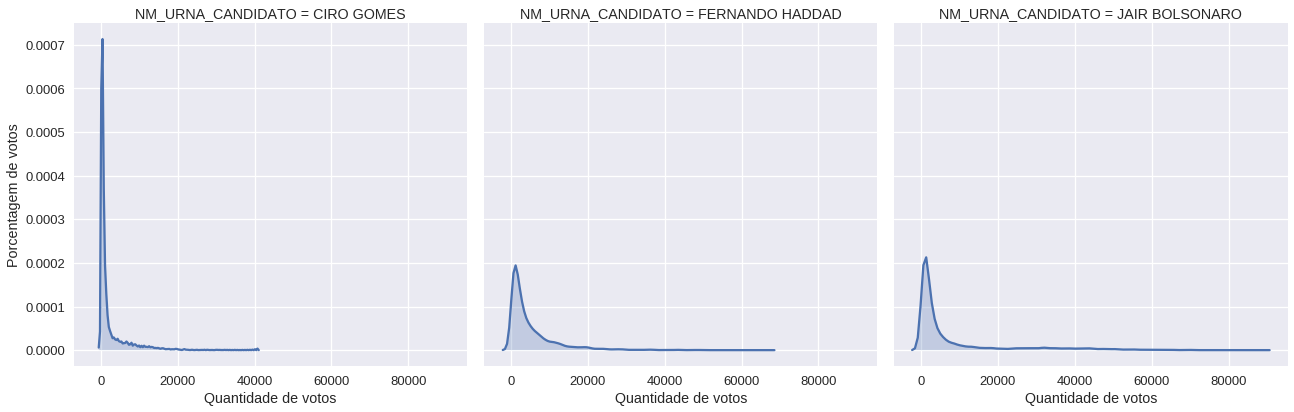

In [68]:
dataBR["NM_URNA_CANDIDATO"] =dataBR["NM_URNA_CANDIDATO"].astype(str)

# Dividindo em um gráfico para candidatos não eleitos e outro para os que foram para o segundo turno.
g = sns.FacetGrid(dataBR, col="NM_URNA_CANDIDATO", size=6 ,col_order=["CIRO GOMES","FERNANDO HADDAD","JAIR BOLSONARO"])

# Escolhendo a coluna QT_VOTOS_NOMINAIS para que os gráficos mostrem a quantidade de votos dos candidatos.
g.map(sns.kdeplot, "QT_VOTOS_NOMINAIS", shade=True  ).set_xlabels("Quantidade de votos").set_ylabels("Porcentagem de votos")

# Plot the graph
plt.show()